# Spatial Relationship

Hubungan spasial digunakan untuk mengecek posisi atau interaksi yang dimiliki oleh 2 object geometry dalam ruang. Beberapa hubungan spasial utama dalam GeoPandas:

1. **Intersects**: Memeriksa apakah dua geometri berbagi bagian ruang apa pun.
2. **Within**: Memeriksa apakah satu geometri sepenuhnya berada di dalam geometri lain.
3. **Contains**: Memeriksa apakah satu geometri sepenuhnya mengandung geometri lain.
4. **Touches**: Memeriksa apakah dua geometri memiliki setidaknya satu titik batas yang sama, tetapi interiornya tidak berpotongan.
5. **Crosses**: Memeriksa apakah dua geometri memiliki beberapa, tetapi tidak semua, titik interior yang sama.
6. **Overlaps**: Memeriksa apakah dua geometri berbagi beberapa, tetapi tidak semua, titik yang sama, dan persimpangannya memiliki dimensi yang sama dengan geometri itu sendiri.
   
![title](image/spatial_relationship_diagram.png)

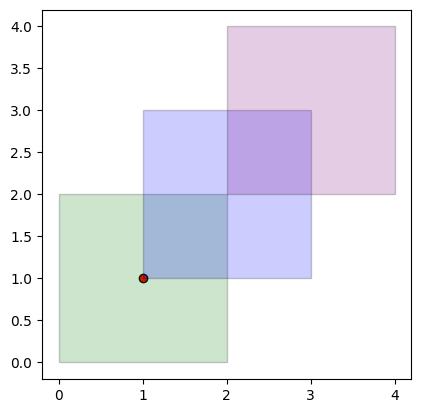

In [37]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

# Create some geometric objects
point = Point(1, 1)
polygon1 = Polygon([(0, 0), (2, 0), (2, 2), (0, 2)])
polygon2 = Polygon([(1, 1), (3, 1), (3, 3), (1, 3)])
polygon3 = Polygon([(2, 2), (4, 2), (4, 4), (2, 4)])

# Create a GeoSeries
geometries = gpd.GeoSeries([point, polygon1, polygon2, polygon3])

fig, ax = plt.subplots()
colors = ['red', 'green', 'blue', 'purple']

for geom, color in zip(geometries, colors):
    if geom.geom_type == 'Point':
        gpd.GeoSeries([geom]).plot(ax=ax, color=color, edgecolor='black')
    else:
        gpd.GeoSeries([geom]).plot(ax=ax, color=color, alpha=0.2, edgecolor='black')

plt.show()

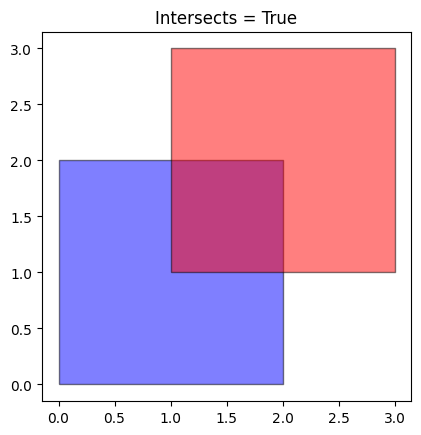

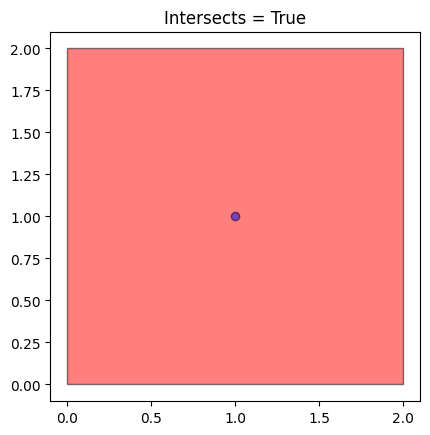

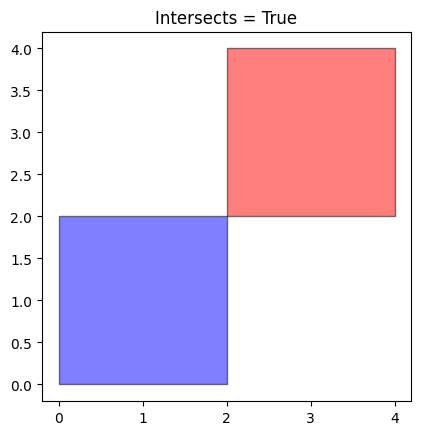

In [38]:
# Plotting function
def plot_relationship(geom, relation_geom, title, is_relation , ax):
    gdf = gpd.GeoDataFrame(geometry=[geom, relation_geom])
    gdf.plot(ax=ax, color=['blue', 'red'], alpha=0.5, edgecolor='k')
    ax.set_title(f'{title} = {is_relation}')

# Intersects
fig, ax = plt.subplots()
is_relation = polygon1.intersects(polygon2)
plot_relationship(polygon1, polygon2, 'Intersects', is_relation, ax)
plt.show()

fig, ax = plt.subplots()
is_relation = point.intersects(polygon1)
plot_relationship(point, polygon1, 'Intersects', is_relation, ax)
plt.show()

fig, ax = plt.subplots()
is_relation = polygon1.intersects(polygon3)
plot_relationship(polygon1, polygon3, 'Intersects', is_relation, ax)
plt.show()

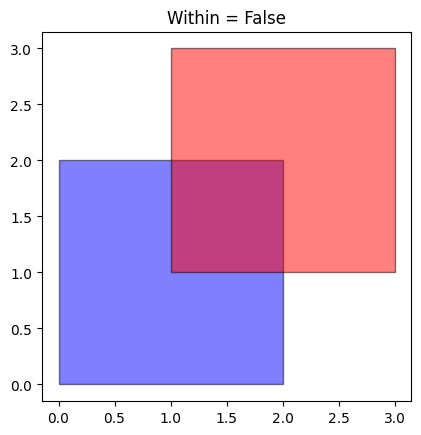

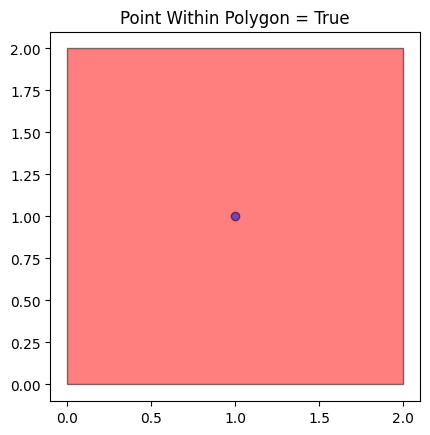

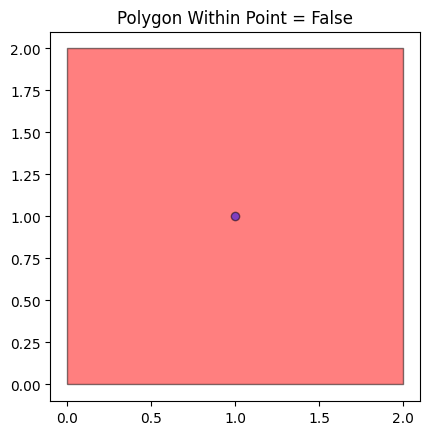

In [39]:
# Within
fig, ax = plt.subplots()
is_relation = polygon1.within(polygon2)
plot_relationship(polygon1, polygon2, 'Within', is_relation, ax)
plt.show()

fig, ax = plt.subplots()
is_relation = point.within(polygon1)
plot_relationship(point, polygon1, 'Point Within Polygon', is_relation, ax)
plt.show()

fig, ax = plt.subplots()
is_relation = polygon1.within(point)
plot_relationship(point, polygon1, 'Polygon Within Point', is_relation, ax)
plt.show()




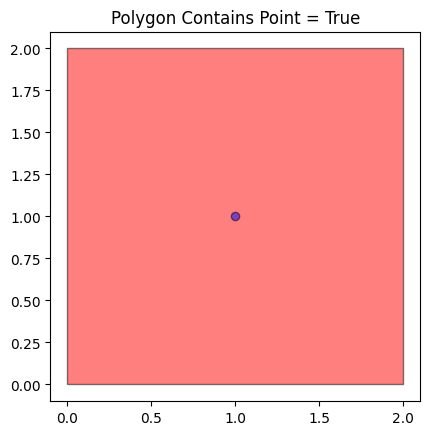

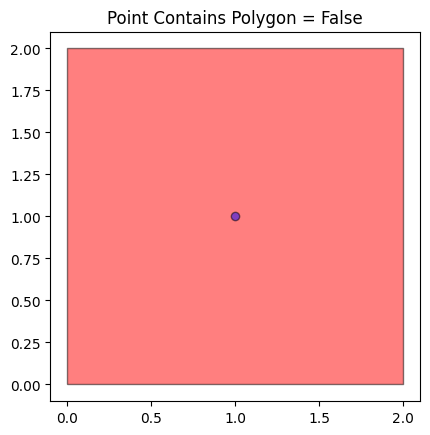

In [40]:
# Contains
fig, ax = plt.subplots()
is_relation = polygon1.contains(point)
plot_relationship(point, polygon1, 'Polygon Contains Point', is_relation, ax)
plt.show()

fig, ax = plt.subplots()
is_relation = point.contains(polygon1)
plot_relationship(point, polygon1, 'Point Contains Polygon', is_relation, ax)
plt.show()

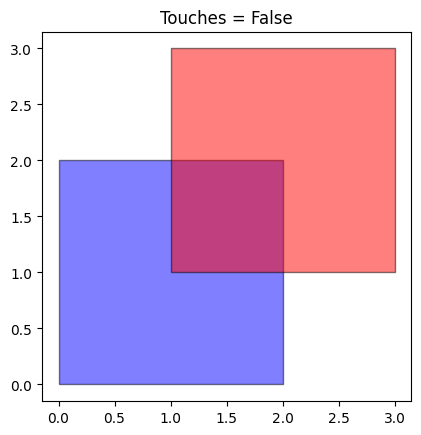

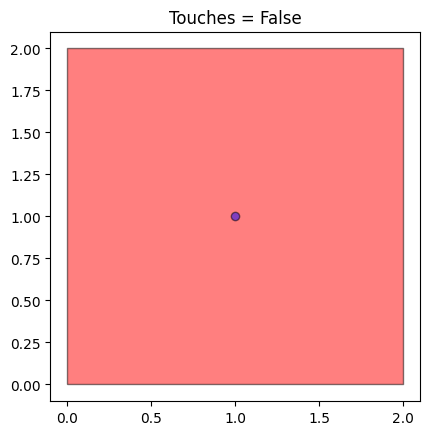

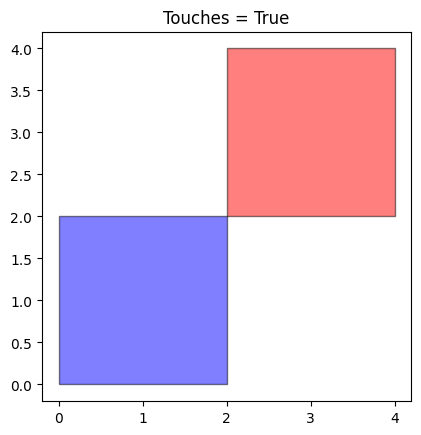

In [41]:
# Touches
fig, ax = plt.subplots()
is_relation = polygon1.touches(polygon2)
plot_relationship(polygon1, polygon2, 'Touches', is_relation, ax)
plt.show()

fig, ax = plt.subplots()
is_relation = point.touches(polygon1)
plot_relationship(point, polygon1, 'Touches', is_relation, ax)
plt.show()

fig, ax = plt.subplots()
is_relation = polygon1.touches(polygon3)
plot_relationship(polygon1, polygon3, 'Touches', is_relation, ax)
plt.show()

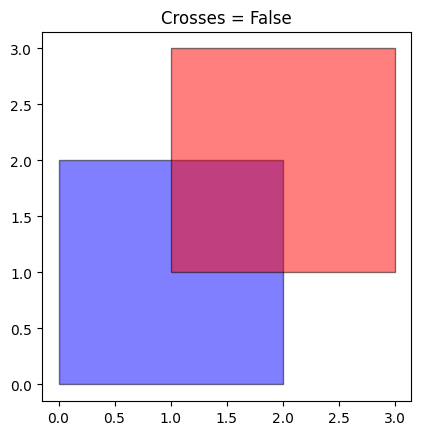

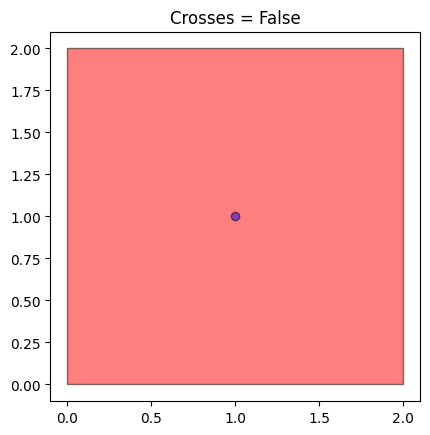

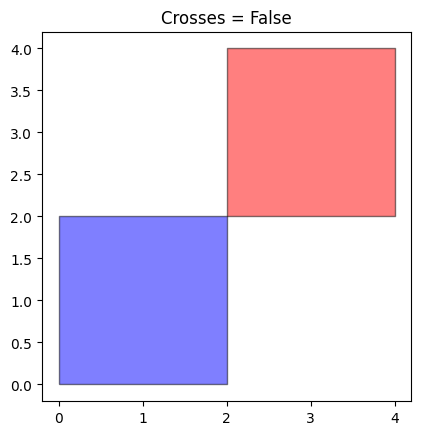

In [42]:
# Crosses
fig, ax = plt.subplots()
is_relation = polygon1.crosses(polygon2)
plot_relationship(polygon1, polygon2, 'Crosses', is_relation, ax)
plt.show()

fig, ax = plt.subplots()
is_relation = point.crosses(polygon1)
plot_relationship(point, polygon1, 'Crosses', is_relation, ax)
plt.show()

fig, ax = plt.subplots()
is_relation = polygon1.crosses(polygon3)
plot_relationship(polygon1, polygon3, 'Crosses', is_relation, ax)
plt.show()



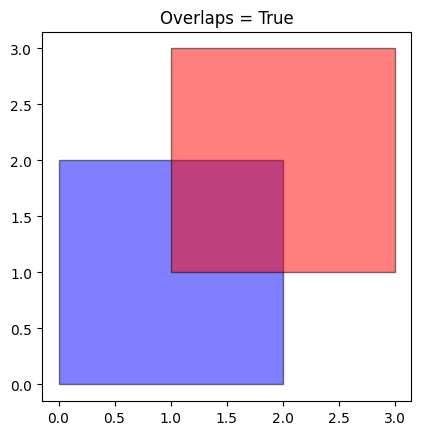

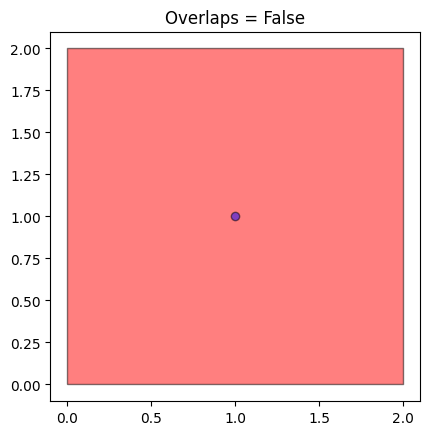

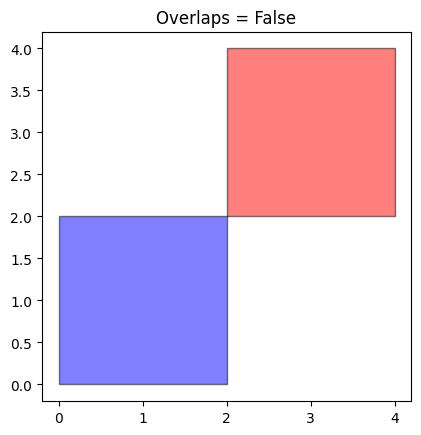

In [43]:
# Overlaps
fig, ax = plt.subplots()
is_relation = polygon1.overlaps(polygon2)
plot_relationship(polygon1, polygon2, 'Overlaps', is_relation, ax)
plt.show()

fig, ax = plt.subplots()
is_relation = point.overlaps(polygon1)
plot_relationship(point, polygon1, 'Overlaps', is_relation, ax)
plt.show()

fig, ax = plt.subplots()
is_relation = polygon1.overlaps(polygon3)
plot_relationship(polygon1, polygon3, 'Overlaps', is_relation, ax)
plt.show()

# Spatial Join

Fungsi **geopandas.sjoin** digunakan untuk melakukan penggabungan data spasial antara dua GeoDataFrame. Join spasial menggabungkan atribut dari dua GeoDataFrame berdasarkan hubungan spasial antara geometrinya. Ini sangat berguna untuk analisis data geospasial di mana kita perlu menggabungkan dataset berdasarkan lokasi spasialnya. (https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.sjoin.html).

Parameter utama yang digunakan dalam spatial join adalah:
1. **left_df**: GeoDataFrame kiri.
2. **right_df**: GeoDataFrame kanan.
3. **how**: Jenis join yang akan dilakukan. Pilihannya adalah:
    1. **'left'**: Menggunakan kunci dari left_df; hanya mempertahankan kolom geometri dari left_df.
    2. **'right'**: Menggunakan kunci dari right_df; hanya mempertahankan kolom geometri dari right_df.
    3. **'inner'**: Menggunakan irisan kunci dari kedua GeoDataFrame; hanya mempertahankan kolom geometri dari left_df.
4. **predicate**: Hubungan spasial yang digunakan untuk join. Pilihannya termasuk:
    1. **'intersects'**: Default. Mengembalikan True jika geometrinya berpotongan.
    2. **'contains'**: Mengembalikan True jika geometri di left_df mengandung geometri di right_df.
    3. **'within'**: Mengembalikan True jika geometri di left_df berada di dalam geometri di right_df.
    4. **touches**
    5. **crosses**
    6. **overlaps**

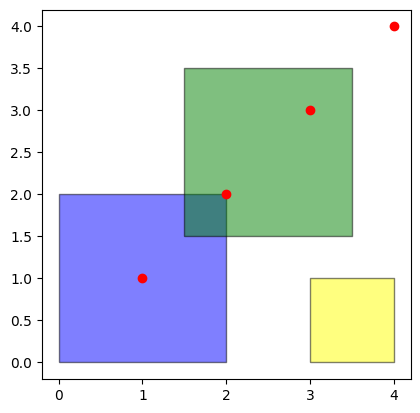

In [45]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

# Membuat GeoDataFrame dengan Points of Interest (POI)
poi_data = {
    'name': ['POI1', 'POI2', 'POI3','POI4'],
    'geometry': [Point(1, 1), Point(2, 2), Point(3, 3), Point(4, 4)]
}
gdf_poi = gpd.GeoDataFrame(poi_data, crs="EPSG:4326")

# Membuat GeoDataFrame dengan batas-batas lingkungan
neighborhood_data = {
    'neighborhood': ['A', 'B', 'C'],
    'geometry': [Polygon([(0, 0), (0, 2), (2, 2), (2, 0)]), 
                 Polygon([(1.5, 1.5), (1.5, 3.5), (3.5, 3.5), (3.5, 1.5)]),
                 Polygon([(3, 0), (4, 0), (4, 1), (3, 1)]),
                ]
}
gdf_neighborhood = gpd.GeoDataFrame(neighborhood_data, crs="EPSG:4326")

fig, ax = plt.subplots()

# Plot the neighborhood boundaries
gdf_neighborhood.plot(ax=ax, color=['blue', 'green','yellow'], alpha=0.5, edgecolor='k')

# Plot the POIs on the same axes
gdf_poi.plot(ax=ax, color='red')

# Show the plot
plt.show()

In [46]:
# Melakukan join spasial
joined_gdf = gpd.sjoin(gdf_poi, gdf_neighborhood, how='left', predicate='intersects')
joined_gdf.head()

,name,geometry,index_right,neighborhood
0,POI1,POINT (1 1),0.0,A
1,POI2,POINT (2 2),0.0,A
1,POI2,POINT (2 2),1.0,B
2,POI3,POINT (3 3),1.0,B
3,POI4,POINT (4 4),NaN,NaN


In [47]:
joined_gdf = gpd.sjoin(gdf_poi, gdf_neighborhood, how='right', predicate='intersects')
joined_gdf.head()

,index_left,name,neighborhood,geometry
0,0.0,POI1,A,"POLYGON ((0 0, 0 2, 2 2, 2 0, 0 0))"
0,1.0,POI2,A,"POLYGON ((0 0, 0 2, 2 2, 2 0, 0 0))"
1,1.0,POI2,B,"POLYGON ((1.5 1.5, 1.5 3.5, 3.5 3.5, 3.5 1.5, ..."
1,2.0,POI3,B,"POLYGON ((1.5 1.5, 1.5 3.5, 3.5 3.5, 3.5 1.5, ..."
2,NaN,NaN,C,"POLYGON ((3 0, 4 0, 4 1, 3 1, 3 0))"


In [48]:
joined_gdf = gpd.sjoin(gdf_poi, gdf_neighborhood, how='inner', predicate='intersects')
joined_gdf.head()

,name,geometry,index_right,neighborhood
0,POI1,POINT (1 1),0,A
1,POI2,POINT (2 2),0,A
1,POI2,POINT (2 2),1,B
2,POI3,POINT (3 3),1,B
